# Isotropic smoothing of image via Heat equation

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from skimage import color
from skimage import io

## load input image
- filename for the input image is 'barbara_color.jpeg'

In [2]:
 
I0 = io.imread('barbara_color.jpeg')

## check the size of the input image

In [3]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = I0.shape[0]
num_column  = I0.shape[1]
num_channel = I0.shape[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  512
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image

In [4]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
I = color.rgb2gray(I0)

num_row     = I.shape[0]
num_column  = I.shape[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  512
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [5]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# 수식: (data- np.min(data)) / (np.max(data) - np.min(data))

I = (I - np.min(I)) / (np.max(I)-np.min(I))
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

In [11]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #Iroll=np.roll(I, -1, axis=0)을 해주면 같은 위치의 Iroll과 I의 값은 Iroll이 I의 [x+1, y]값이므로 Iroll-I를 해주면 됨
    #np.roll(I, -1, axis=0)을 한 후에 Iroll[num_row-1, :] = Iroll[num_row-2: ]를 해주고 Iroll에서 I를 빼준다
    
    Iroll = np.roll(I, -1, axis=0)
    Iroll[num_row-1, :]=Iroll[num_row-2,:]
    D=Iroll-I
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [12]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # Iroll = np.roll(I, 1, axis=0)을 하면 Iroll의 [x,y]인덱스에는 I의 [x-1,y]값이 들어있음 따라서 I에서 Iroll을 빼줘야함
    
    Iroll = np.roll(I, 1, axis=0)
    Iroll[0,:]=Iroll[1,:]
    D=I-Iroll

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [13]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # Iroll= np.roll(I, -1, axis=1)이면 Iroll의 [x,y]값이 I의 [x,y+1]값과 같으므로 Iroll-I
    #slicing => Iroll[:, num_column-1:num_column]하면 세로로 마지막 한줄
    #Iroll[:. num_column-2: num_column-1]하면 세로로 마지막에서 앞에 한줄
    
    Iroll = np.roll(I, -1, axis=1)
    Iroll[:, num_column-1:num_column]=Iroll[:,num_column-2:num_column-1]
    D=Iroll-I
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [22]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # Iroll = np.roll(I, 1, axis=1)하면 Iroll[x,y]값이 I[x,y-1]값과 같음 따라서 I-Iroll
    # 슬라이싱: Iroll[:,0:1]=Iroll[:,1:2]

    Iroll = np.roll(I, 1, axis=1)
    Iroll[:,0:1]=Iroll[:,1:2]
    D=I-Iroll
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## define a function to compute the laplacian of input matrix
- $\Delta I = \nabla^2 I = \frac{\partial^2 I}{\partial x^2} + \frac{\partial^2 I}{\partial y^2}$
- $\Delta I = I[x+1, y] + I[x-1, y] + I[x, y+1] + I[x, y-1] - 4 * I[x, y]$
- $\Delta I$ = derivative_x_forward - derivative_x_backward + derivative_y_forward - derivative_y_backward

In [23]:
def compute_laplace(I):
    
    laplace = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    laplace = compute_derivative_x_forward(I) - compute_derivative_x_backward(I) + compute_derivative_y_forward(I) - compute_derivative_y_backward(I)
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return laplace

## define a function to compute the heat equation of data $I$ with a time step
- $I = I + \delta t * \Delta I$

In [51]:
def heat_equation(I, time_step):
    
    I_update = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    I_update = I + time_step * compute_laplace(I)

    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

## run the heat equation over iterations

In [99]:
def run_heat_equation(I, time_step, number_iteration):

    I_update = np.zeros(I.shape)

    for t in range(number_iteration):
        # ++++++++++++++++++++++++++++++++++++++++++++++++++
        # complete the blanks
        #
        
        I_update=I+time_step*compute_laplace(I)[t]

    
        #
        # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return I_update

___

___

## functions for presenting the results

___

___

In [6]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [8]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [24]:
def function_result_03():

    L = compute_laplace(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(L, cmap='gray')
    plt.show()

In [73]:
def function_result_04():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [100]:
def function_result_05():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [101]:
def function_result_06():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)
    
    plt.figure(figsize=(8,6))
    plt.imshow(I_update, vmin=0, vmax=1, cmap='gray')
    plt.show()

In [76]:
def function_result_07():

    L = compute_laplace(I)

    value1 = L[0, 0]    
    value2 = L[-1, -1]    
    value3 = L[100, 100]    
    value4 = L[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [77]:
def function_result_08():

    time_step   = 0.25
    I_update    = heat_equation(I, time_step)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [102]:
def function_result_09():

    time_step           = 0.25
    number_iteration    = 128

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

In [103]:
def function_result_10():

    time_step           = 0.25
    number_iteration    = 512

    I_update = run_heat_equation(I, time_step, number_iteration)

    value1 = I_update[0, 0]    
    value2 = I_update[-1, -1]    
    value3 = I_update[100, 100]    
    value4 = I_update[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


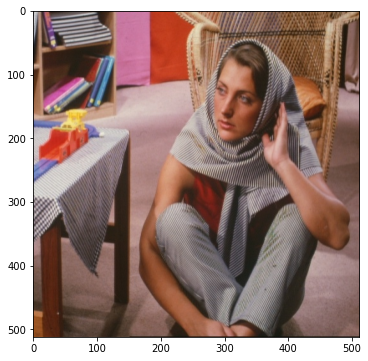

**************************************************
## [RESULT 02]
**************************************************


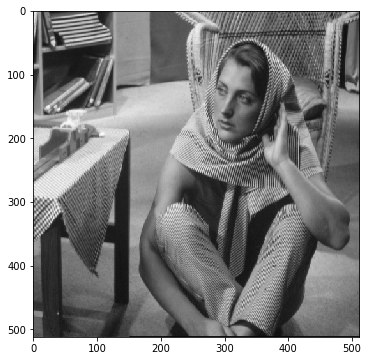

**************************************************
## [RESULT 03]
**************************************************


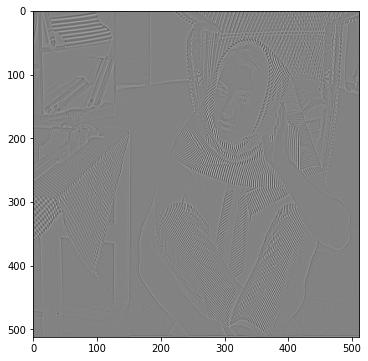

**************************************************
## [RESULT 04]
**************************************************


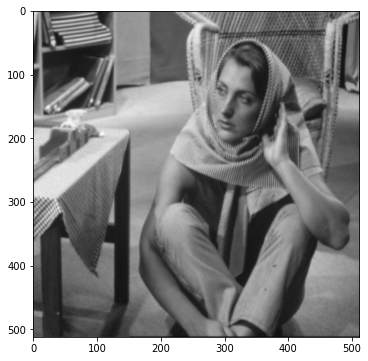

**************************************************
## [RESULT 05]
**************************************************


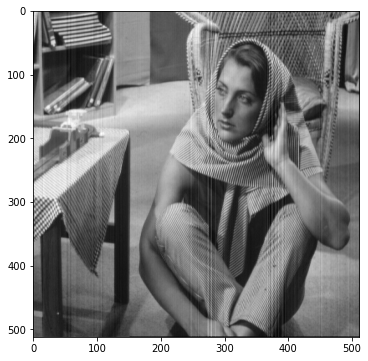

**************************************************
## [RESULT 06]
**************************************************


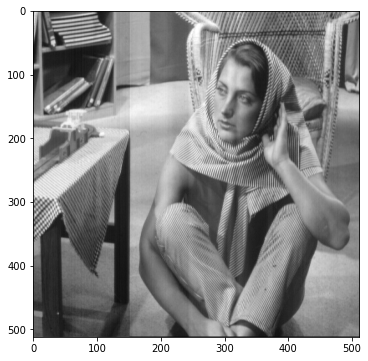

**************************************************
## [RESULT 07]
**************************************************
value1 =  0.38873832902073646
value2 =  0.3503440089528004
value3 =  -0.1205387483392179
value4 =  -0.05899756869858064
**************************************************
## [RESULT 08]
**************************************************
value1 =  0.11620040458063048
value2 =  0.157486029006043
value3 =  0.5094184630641501
value4 =  0.5927687759993217
**************************************************
## [RESULT 09]
**************************************************
value1 =  0.019961353094482524
value2 =  0.09209980188244968
value3 =  0.5425014970903844
value4 =  0.6021144376333675
**************************************************
## [RESULT 10]
**************************************************
value1 =  0.024564711815094998
value2 =  0.157486029006043
value3 =  0.533446153354437
value4 =  0.7020786805894961


In [104]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)